
# **Text Classification: Topic Modeling LDA​**


## Overview

This course ?????

We will learn the ????? through the following activities:

- Activity 1:
- Activity 2:



---



# **Overview of Latent Dirichlet Allocation (LDA)**

# **Implementation of LDA**

- Loading data
- Data cleaning
- Exploratory analysis
- Prepare data for LDA analysis
- LDA model training
- Analyzing LDA model results


# **Task Descrption**

- Spam mail classification



---



> 👋 New to Google Colab and Python? No worries! Let's get you started by running the code snippet below to make sure everything is working properly for you. It's a great way to take your first steps into coding!

In [ ]:
print("Enter your name and press enter:")
name = input()
print("\r")
print("Hello {}, welcome to the Topic Modelling with LDA!".format(name))

# Import Python libriary

In [1]:
!pip install gensim
!pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.6 MB/s eta 0:00:00


# Loading data







In [2]:
import zipfile
import pandas as pd
import os

# Open the zip file
!wget https://github.com/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/raw/refs/heads/main/Task1-LDA-spam-mail/NIPS_Papers.zip
!unzip /content/NIPS_Papers.zip

--2025-09-23 12:47:13--  https://github.com/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/raw/refs/heads/main/Task1-LDA-spam-mail/NIPS_Papers.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/refs/heads/main/Task1-LDA-spam-mail/NIPS_Papers.zip [following]
--2025-09-23 12:47:13--  https://raw.githubusercontent.com/peiyulan/Text-Classification-in-Practice-From-Topic-Models-to-Transformers-/refs/heads/main/Task1-LDA-spam-mail/NIPS_Papers.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 635

In [3]:
# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("NIPS Papers/papers.csv")

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Data Cleaning

In [4]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1519447721.py:12: SyntaxWarning: invalid escape sequence '\.'
  papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))


,paper_text_processed
1306,a systematic study or the input/output propert...
3822,maximal cliques that satisfy hard constraints ...
6157,optimal depth neural networks for multiplicati...
5166,double or nothing: multiplicative\nincentive m...
719,spike-based learning rules and stabilization o...




---



# Exploratory analysis

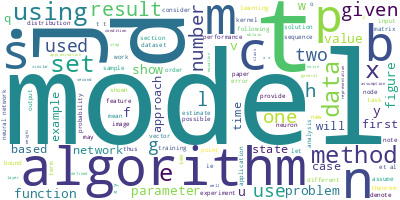

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()



---



# Prepare data for LDA analysis

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['systematic', 'study', 'input', 'output', 'properties', 'systematic', 'study', 'input', 'output', 'properties', 'compartment', 'model', 'neuron', 'active', 'membranes', 'paul', 'rhodes', 'university', 'california', 'san', 'diego', 'abstract', 'input', 'output', 'properties', 'compartment', 'model', 'neuron', 'systematically', 'explored']


In [6]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 13), (6, 5), (7, 13), (8, 5), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 2), (17, 4), (18, 1), (19, 1), (20, 1), (21, 1), (22, 4), (23, 3), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]




---



# Train LDA model

In [7]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"learning" + 0.005*"algorithm" + 0.005*"data" + 0.004*"training" + '
  '0.004*"function" + 0.003*"error" + 0.003*"set" + 0.003*"model" + '
  '0.003*"figure" + 0.003*"one"'),
 (1,
  '0.007*"learning" + 0.005*"algorithm" + 0.004*"model" + 0.004*"set" + '
  '0.003*"problem" + 0.003*"two" + 0.003*"data" + 0.003*"one" + 0.003*"time" + '
  '0.003*"using"'),
 (2,
  '0.008*"learning" + 0.006*"model" + 0.006*"data" + 0.004*"set" + '
  '0.004*"training" + 0.004*"using" + 0.004*"input" + 0.003*"one" + '
  '0.003*"algorithm" + 0.003*"function"'),
 (3,
  '0.005*"model" + 0.005*"data" + 0.004*"learning" + 0.004*"set" + '
  '0.003*"using" + 0.003*"models" + 0.003*"algorithm" + 0.003*"problem" + '
  '0.003*"number" + 0.003*"two"'),
 (4,
  '0.006*"learning" + 0.006*"data" + 0.005*"model" + 0.005*"training" + '
  '0.005*"time" + 0.004*"set" + 0.004*"number" + 0.004*"algorithm" + '
  '0.003*"figure" + 0.003*"two"'),
 (5,
  '0.005*"model" + 0.004*"data" + 0.004*"learning" + 0.003*"using" + '

# Analyse the trained LDA model

In [9]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

LDAvis_prepared

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.006928  0.003170       1        1  22.824550
6      0.003133 -0.000442       2        1  19.666171
7     -0.006999  0.007322       3        1  12.032399
4     -0.000407 -0.005636       4        1  10.228017
0     -0.009546 -0.003360       5        1   8.727807
2      0.001682 -0.000201       6        1   7.152915
9      0.001548 -0.006780       7        1   5.475011
3      0.003393  0.004307       8        1   5.116358
5      0.002673 -0.000704       9        1   4.400345
1     -0.002407  0.002324      10        1   4.376426, topic_info=           Term         Freq        Total Category  logprob  loglift
344    learning  1351.000000  1351.000000  Default  30.0000  30.0000
847        data  1087.000000  1087.000000  Default  29.0000  29.0000
383       model  1225.000000  1225.000000  Default  28.0000  28.0000
723   algorithm   929.000000   929.000000  Default  27.0000  27.0000
1381        two   682.000000   682.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
847        data    32.055040  1087.032376  Topic10  -5.7561  -0.3948
418      number    26.286355   719.323690  Topic10  -5.9545  -0.1803
165   different    23.115717   534.025926  Topic10  -6.0830  -0.0110
261    function    24.654566   780.773336  Topic10  -6.0186  -0.3264
765       based    21.765151   554.650907  Topic10  -6.1432  -0.1091

[866 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
5462       1  0.271959  abalone
5462       2  0.271959  abalone
5462       6  0.271959  abalone
15297      1  0.298690   accent
15297      2  0.298690   accent
...      ...       ...      ...
3582       6  0.143234       zt
3582       7  0.023872       zt
3582       8  0.071617       zt
3582       9  0.047745       zt
3582      10  0.023872       zt

[3908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 8, 5, 1, 3, 10, 4, 6, 2])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)




---



# **Resources List**

**Tutorials**



**Readings**

